# Hypothesis: I think students who find COMP 110 *interesting* are more likely to recommend it to other students than those who find COMP 110 to be *easy*.
## Interesting is quantified as 5 or greater, and easy is quantified as 3 or less difficulty. Likely to recommend is quantified as 5 or greater.

The code below will be used to automatically reload any changes made to and saved in imported modules.

In [98]:
%reload_ext autoreload
%autoreload 2

Next I will read in the csv data and convert it to a column oriented data table.

In [99]:
from data_utils import read_csv_rows, columnar

data_rows: list[dict[str, str]] = read_csv_rows('../../data/survey.csv')
columns: dict[str, list[str]] = columnar(data_rows)

Then I will select the three desired columns and present the first ten rows of the newly created table. The columns I need for my data analysis are *difficulty*, *interesting*, and *would_recommend*. I also use the head function to show the first 5 entries of the data table.

In [100]:
from data_utils import select, head
subset: dict[str, list[str]] = select(columns, ["difficulty", "interesting", "would_recommend"])
head(subset, 5)

{'difficulty': ['5', '3', '5', '6', '4'],
 'interesting': ['5', '7', '7', '5', '6'],
 'would_recommend': ['7', '7', '7', '7', '7']}

Next I will create a list of only students who said they would recommend the class to a friend, filtering out those who would not since they do not need to be in this analysis. The rec function creates a list of True or False depending on whether or not the students would recommend the class, and it will be used later to create a list of students who would recommend and either found the class interesting or easy.

In [101]:
def rec(col: list[str], threshold: int) -> list[bool]:
    """Create a mask list of students who said they would recommend COMP 110 to a friend."""
    result: list[bool] = []
    for response in col:
        result.append(response > "4")
    return result

would_recommend_mask: list[bool] = rec(subset["would_recommend"], 4)

Then I will create a list of students' perceived difficulty of COMP 110 ONLY if they said they would recommend it to another student using the mask function. I will create another list containing students' interest in the course ONLY if they said they would recommend it to another student.

In [102]:
def masked(col: list[str], mask: list[bool]) -> list[str]:
    """Create a list of responses that are True under the mask."""
    result: list[str] = []
    for i in range(len(mask)):
        if mask[i]:
            result.append(col[i])
    return result

easy_recommend: list[str] = masked(subset["difficulty"], would_recommend_mask)
interested_recommend: list[str] = masked(subset["interesting"], would_recommend_mask)

I then will create two dictionaries: one containing the difficulty responses of students who would recommend the course, and the other containing the interest level of students who would recommend the course. The count function will sum the total responses of each choice, 1-7.

In [103]:
from data_utils import count
easy_rec_values = count(easy_recommend)
interested_rec_values = count(interested_recommend)

Then I will combine the difficulty ratings of 1, 2, and 3 to total the students who found the class easy. I also will combine the interest ratings of 5, 6, and 7 to total the students who found the class interesting. These values will be the final results.

In [104]:
easy_rec_total = easy_rec_values["1"] + easy_rec_values["2"] + easy_rec_values["3"]
interested_rec_total = interested_rec_values["5"] + interested_rec_values["6"] + interested_rec_values["7"]
print(f"Total number of students who responsed 'easy' and 'would recommend': {easy_rec_total}")
print(f"Total number of students who responsed 'interesting' and 'would recommend': {interested_rec_total}")

Total number of students who responsed 'easy' and 'would recommend': 91
Total number of students who responsed 'interesting' and 'would recommend': 390


Finally, I will create a graph and a table to show the number of students who responded accordingly in comparison to one another. This is done using matplotlib.

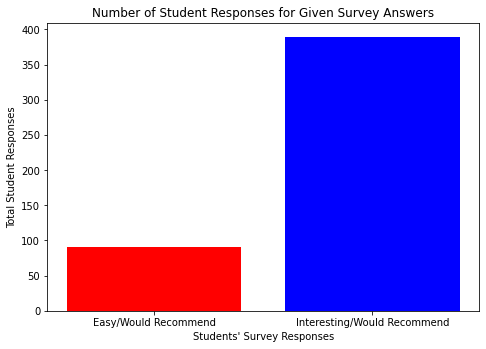

-------------------------------  ---
Easy and Would Recommend          91
Interesting and Would Recommend  390
Total                            481
-------------------------------  ---


In [121]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
x = ["Easy/Would Recommend", "Interesting/Would Recommend"]
y = [easy_rec_total, interested_rec_total]
ax.bar(x, y, color=['r', 'b'])
ax.set_title("Number of Student Responses for Given Survey Answers")
plt.xlabel("Students' Survey Responses")
plt.ylabel("Total Student Responses")
plt.show()

from tabulate import tabulate
table = [["Easy and Would Recommend", easy_rec_total], ["Interesting and Would Recommend", interested_rec_total], ["Total", easy_rec_total + interested_rec_total]]
print(tabulate(table))

This data analysis looked at survey responses and quantified the number of students who responded that COMP 110 was easy (difficulty rating of 3 or less) or interesting (interesting rating of 5 or greater) and said they would recommend the class to a fellow student (would_recommend rating of 5 or more).

I hypothesized that students who found the class interesting were more likely to recommend the class than those who found the class easy. The results of this analysis showed that 390 students found COMP 110 to be interesting and said they would recommend it to a peer, which is significantly higher than the 91 students who found COMP 110 to be easy and said they would recommend it to a peer.